<a href="https://colab.research.google.com/github/Lee-jun-young98/Heart_disease_prediction/blob/main/%EC%8B%AC%EC%9E%A5%EC%A7%88%ED%99%98%EC%98%88%EC%B8%A1%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import warnings
# evaluation of a model using 5 features chosen with random forest importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import lightgbm as lgbm
warnings.filterwarnings('ignore')

path = "/content/drive/MyDrive/Dacon/heart_disease_predict/"
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")


In [ ]:
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

check_missing_col(train)

결측치가 존재하지 않습니다


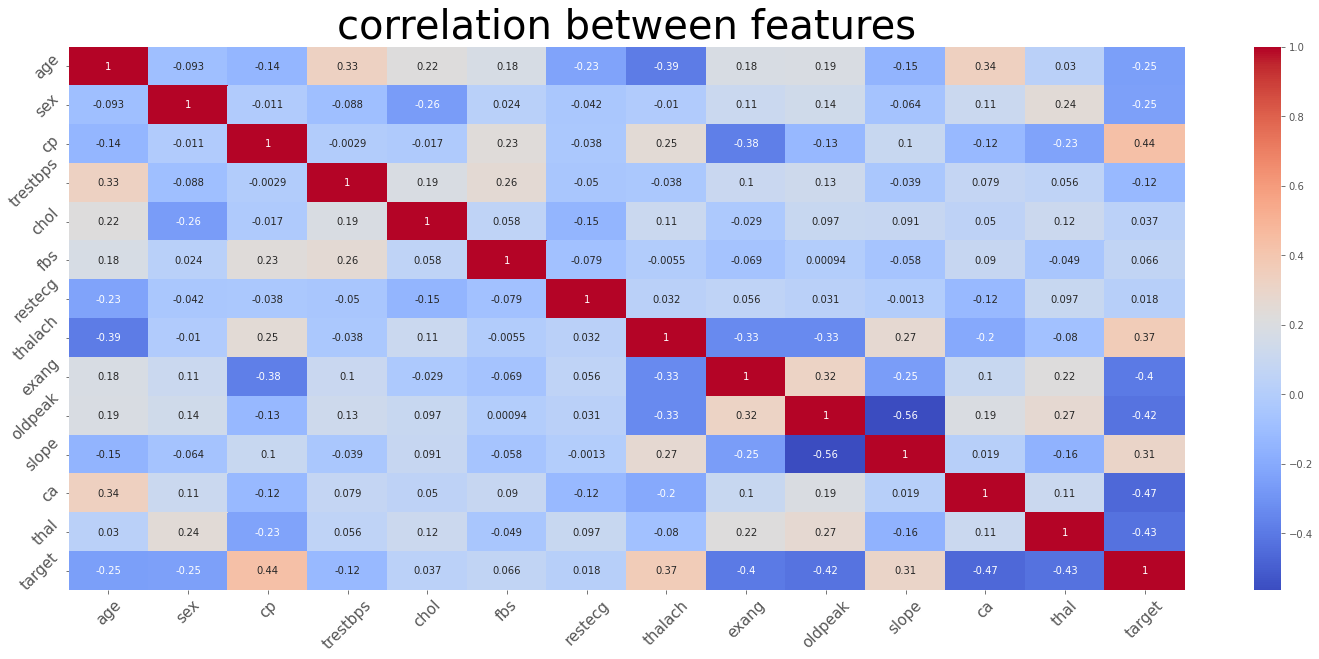

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(25,10))

heat_table = train.drop(['id'], axis=1).corr()
heatmap_ax = sns.heatmap(heat_table, annot=True,cmap='coolwarm')

heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15, rotation=45)

plt.title('correlation between features', fontsize=40)
plt.show()

In [ ]:
# target과 다른 feature들의 상관계수는 아래와 같습니다.
corr_score = abs(heat_table.target[:-1])

# 상관계수 절대값을 기준으로 내림차순으로 정렬합니다.
corr_score.sort_values()

restecg     0.017528
chol        0.036991
fbs         0.065821
trestbps    0.122850
sex         0.246289
age         0.247806
slope       0.305994
thalach     0.365249
exang       0.396145
oldpeak     0.421514
thal        0.428530
cp          0.436273
ca          0.466289
Name: target, dtype: float64

In [ ]:
# 성능 변화 평가를 위해 data 나누기
X = train.iloc[:, 1:-1] 
Y = train.iloc[:, -1] 

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.5, shuffle=True, random_state=34)

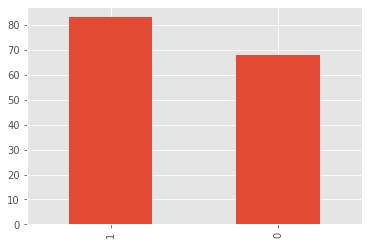

In [ ]:
Y.value_counts().plot(kind="bar")

In [ ]:
# 성능 출력 함수
from sklearn.metrics import f1_score

def print_score(predicted, y):
    accuracy = sum(predicted == y) / len(y)*100
    f1 = f1_score(y, predicted)*100
    print(f'accuracy: {accuracy:.2f}%') # 정확도 출력
    print(f'f1_score : {f1:.2f}%') # f1 score 출력
    return accuracy, f1


check_acc = []
check_f1 = []

In [ ]:
from sklearn.linear_model import LogisticRegression
#1단계 train 데이터 준비
step_1_train_x = x_train.copy()

#1단계 train
LR_step_1_model = LogisticRegression()
LR_step_1_model.fit(step_1_train_x, y_train)
#1단계 validation 데이터 준비
step_1_val_x = x_val.copy()

#1단계 validaion
LR_step_1_preds = LR_step_1_model.predict(step_1_val_x)
acc, f1 = print_score(LR_step_1_preds, y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 80.26%
f1_score : 83.87%


In [ ]:
#2단계 train 데이터 준비
step_2_train_x = x_train.drop("restecg",axis=1)

#2단계 train
LR_step_2_model= LogisticRegression()
LR_step_2_model.fit(step_2_train_x, y_train)

#2단계 validation 데이터 준비
step_2_val_x = x_val.drop("restecg", axis=1)

#2단계 validation
LR_step_2_preds = LR_step_2_model.predict(step_2_val_x)
acc, f1 = print_score(LR_step_2_preds, y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 81.58%
f1_score : 85.11%


In [ ]:
#3단계 train 데이터 준비
step_3_train_x = x_train.drop(["restecg","chol"],axis=1)

#3단계 train 
LR_step_3_model= LogisticRegression()
LR_step_3_model.fit(step_3_train_x, y_train)

#3단계 validation 데이터 준비
step_3_val_x = x_val.drop(["restecg","chol"],axis=1)

#3단계 validation
LR_step_3_preds = LR_step_3_model.predict(step_3_val_x)
acc, f1 = print_score(LR_step_3_preds, y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 80.26%
f1_score : 84.21%


In [ ]:
#4단계 train 데이터 준비
step_4_train_x = x_train.drop(["restecg","chol","fbs"],axis=1)

#4단계 train
LR_step_4_model= LogisticRegression()
LR_step_4_model.fit(step_4_train_x,y_train)

#4단계 validaion 데이터 준비
step_4_val_x = x_val.drop(["restecg","chol","fbs"],axis=1)

#4단계 validation
LR_step_4_preds = LR_step_4_model.predict(step_4_val_x)
acc, f1 = print_score(LR_step_4_preds,y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 81.58%
f1_score : 85.11%


In [ ]:
#5단계 trian 데이터 준비
step_5_train_x = x_train.drop(["restecg","chol","fbs","trestbps"],axis=1)

#5단계 train
LR_step_5_model= LogisticRegression()
LR_step_5_model.fit(step_5_train_x,y_train)

#5단계 validation 데이터 준비
step_5_val_x = x_val.drop(["restecg","chol","fbs","trestbps"],axis=1)

#5단계 validation
LR_step_5_preds = LR_step_5_model.predict(step_5_val_x)
acc, f1 = print_score(LR_step_5_preds,y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 82.89%
f1_score : 85.71%


In [ ]:
#6단계 trian 데이터 준비
step_6_train_x = x_train.drop(["age", "sex", "trestbps", "chol", "fbs", "restecg", "exang", "oldpeak"],axis=1)

#6단계 train
LR_step_6_model= LogisticRegression()
LR_step_6_model.fit(step_6_train_x,y_train)

#6단계 validation 데이터 준비
step_6_val_x = x_val.drop(["age", "sex", "trestbps", "chol", "fbs", "restecg", "exang", "oldpeak"],axis=1)

#5단계 validation
LR_step_6_preds = LR_step_6_model.predict(step_6_val_x)
acc, f1 = print_score(LR_step_6_preds,y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 82.89%
f1_score : 85.39%


In [ ]:
#7단계 trian 데이터 준비
step_7_train_x = x_train.drop(["sex", "trestbps", "chol", "fbs", "restecg", "exang", "oldpeak"],axis=1)

#7단계 train
LR_step_7_model= LogisticRegression()
LR_step_7_model.fit(step_7_train_x,y_train)

#7단계 validation 데이터 준비
step_7_val_x = x_val.drop(["sex", "trestbps", "chol", "fbs", "restecg", "exang", "oldpeak"],axis=1)

#7단계 validation
LR_step_7_preds = LR_step_7_model.predict(step_7_val_x)
acc, f1 = print_score(LR_step_7_preds,y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 80.26%
f1_score : 83.15%


In [ ]:
#8단계 trian 데이터 준비
step_8_train_x = x_train.drop(["age", "trestbps", "chol", "fbs", "restecg", "exang", "oldpeak"],axis=1)

#6단계 train
LR_step_8_model= LogisticRegression()
LR_step_8_model.fit(step_8_train_x,y_train)

#6단계 validation 데이터 준비
step_8_val_x = x_val.drop(["age", "trestbps", "chol", "fbs", "restecg", "exang", "oldpeak"],axis=1)

#5단계 validation
LR_step_8_preds = LR_step_8_model.predict(step_8_val_x)
acc, f1 = print_score(LR_step_8_preds,y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 81.58%
f1_score : 84.44%


In [ ]:
#9단계 trian 데이터 준비
step_9_train_x = x_train.drop(["trestbps", "chol", "fbs", "restecg", "exang", "oldpeak"],axis=1)

#9단계 train
LR_step_9_model= LogisticRegression()
LR_step_9_model.fit(step_9_train_x,y_train)

#9단계 validation 데이터 준비
step_9_val_x = x_val.drop(["trestbps", "chol", "fbs", "restecg", "exang", "oldpeak"],axis=1)

#9단계 validation
LR_step_9_preds = LR_step_9_model.predict(step_9_val_x)
acc, f1 = print_score(LR_step_9_preds,y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 81.58%
f1_score : 84.09%


In [ ]:
#10단계 trian 데이터 준비
step_10_train_x = x_train.drop(["trestbps", "chol", "fbs", "restecg", "oldpeak"],axis=1)

#10단계 train
LR_step_10_model= LogisticRegression()
LR_step_10_model.fit(step_10_train_x,y_train)

#10단계 validation 데이터 준비
step_10_val_x = x_val.drop(["trestbps", "chol", "fbs", "restecg","oldpeak"],axis=1)

#10단계 validation
LR_step_10_preds = LR_step_10_model.predict(step_10_val_x)
acc, f1 = print_score(LR_step_10_preds,y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 78.95%
f1_score : 81.82%


In [ ]:
#11단계 trian 데이터 준비 #cp
step_11_train_x = x_train.drop(["cp","trestbps", "chol", "fbs", "restecg", "exang"],axis=1)

#11단계 train
LR_step_11_model= LogisticRegression()
LR_step_11_model.fit(step_11_train_x,y_train)

#11단계 validation 데이터 준비
step_11_val_x = x_val.drop(["cp","trestbps", "chol", "fbs", "restecg", "exang"],axis=1)

#11단계 validation
LR_step_11_preds = LR_step_11_model.predict(step_11_val_x)
acc, f1 = print_score(LR_step_11_preds,y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 84.21%
f1_score : 86.36%


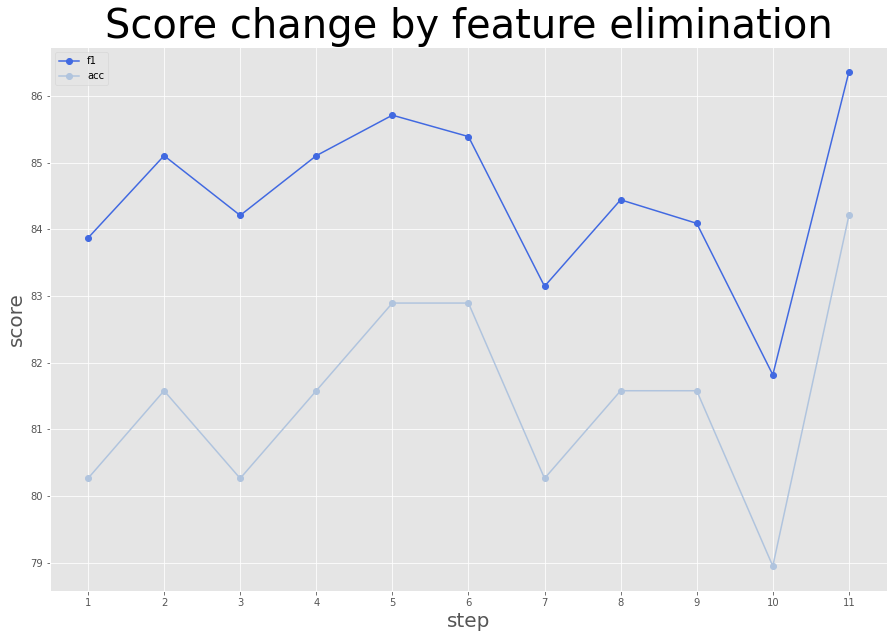

In [ ]:
#5개의 모델들의 성능 비교해보기
step = [1,2,3,4,5,6,7,8,9,10,11]

#plt.bar(step,acc,label="acc")
plt.figure(figsize=(15,10))
plt.plot(step, check_f1, 'bo-', label="f1", color = 'royalblue')
plt.plot(step, check_acc, 'bo-', label='acc', color='lightsteelblue')

plt.title("Score change by feature elimination", size=40)
plt.xlabel("step", size=20)
plt.ylabel("score", size=20)
plt.xticks(step)
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm

x_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
  
def get_stats():
  x = x_train[x_columns]
  results = sm.OLS(Y, X).fit()
  print(results.summary())

get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.800
Model:                            OLS   Adj. R-squared (uncentered):              0.781
Method:                 Least Squares   F-statistic:                              42.39
Date:                Wed, 22 Dec 2021   Prob (F-statistic):                    1.12e-41
Time:                        06:10:28   Log-Likelihood:                         -47.663
No. Observations:                 151   AIC:                                      121.3
Df Residuals:                     138   BIC:                                      160.6
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
best_model_train_x = X.drop(["cp","trestbps", "chol", "fbs", "restecg", "exang"],axis=1)

best_model = LogisticRegression()
best_model.fit(best_model_train_x,Y)

cross-val-score
[0.83870968 0.83333333 0.83333333 0.86666667 0.73333333]
corss-val-score.mean
0.821


In [ ]:
models = []
models.append(['Logistic Regression', LogisticRegression(random_state=0)])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric = 'error')])
models.append(['lightgbm', lgbm.LGBMClassifier(objective="binary")])
list_1 = []


new_x_train = x_train.drop(["cp","trestbps", "chol", "fbs", "restecg", "exang"],axis=1)
new_x_val = x_val.drop(["cp","trestbps", "chol", "fbs", "restecg", "exang"],axis=1)
for m in range(len(models)):
    list_2 = []
    model = models[m][1]
    model.fit(new_x_train, y_train)
    y_pred = model.predict(new_x_val)
    print(models[m][0])
    Accuracy_score, F1SCORE = print_score(y_val, y_pred)
    print("============================")
    list_2.append(models[m][0])
    list_2.append(Accuracy_score)
    list_2.append(F1SCORE)
    list_1.append(list_2)

df = pd.DataFrame(list_1, columns =  ['Model', 'Accuracy','F1'])

df    

Logistic Regression
accuracy: 84.21%
f1_score : 86.36%
Decision Tree
accuracy: 75.00%
f1_score : 79.57%
Random Forest
accuracy: 78.95%
f1_score : 82.22%
XGBoost
accuracy: 72.37%
f1_score : 76.40%
lightgbm
accuracy: 77.63%
f1_score : 80.46%


,Model,Accuracy,F1
0,Logistic Regression,84.210526,86.363636
1,Decision Tree,75.000000,79.569892
2,Random Forest,78.947368,82.222222
3,XGBoost,72.368421,76.404494
4,lightgbm,77.631579,80.459770


In [ ]:
#test data 준비
best_model_test = test.drop(["id","cp","restecg","chol","fbs","trestbps", "exang"],axis=1)

# 값을 예측합니다.
test_preds = best_model.predict(best_model_test)

In [ ]:
# 제출용 sample 파일을 불러옵니다.
submission = pd.read_csv(path + "sample_submission.csv")
submission['target'] = test_preds

submission.to_csv('baseline.csv', index = False)